In [1]:
import requests 
import datetime
import pandas as pd
import altair as alt


from dotenv import load_dotenv
import os

load_dotenv()

# api_key=os.getenv("WEATHERAPI_APIKEY")

True

In [2]:
# Historical data does not work with the free key
# response = requests.get(f"https://api.weatherapi.com/v1/current.json?key={api_key}&q=Berlin&dt=2015-01-01")
# berlin = response.json()

In [3]:
# I thought about doing an API-Call, but downloading the csv was just so much easier. 

# response = requests.get('https://archive-api.open-meteo.com/v1/archive?latitude=52.52&longitude=13.405&start_date=2015-06-16&end_date=2025-06-15&daily=temperature_2m_mean,rain_sum,snowfall_sum,sunshine_duration')

# berlin = response.json()

# response = requests.get('https://archive-api.open-meteo.com/v1/archive?latitude=40.6782&longitude=73.9442&start_date=2015-06-16&end_date=2025-06-15&daily=temperature_2m_mean,rain_sum,snowfall_sum,sunshine_duration')

# new_york = response.json()

Data source: https://open-meteo.com/

This describtion works for both dataframes - one will have berlin added, the other one will have brooklyn added

day: date of the measures
temperature: mean temperature on that day in Celcius
rain: sum of rain on that day in millimeter
snowfall: sum of snowfall on that day in Centimeter
sunshine: duration of sunshine in that day in hours (converted von seconds to hours)

In [4]:
df = pd.read_csv('raw/weather_ berlin.csv', header=2)

In [5]:
# rename columns

(
    df
    .rename(
        columns={
            'time': 'day', 
            'temperature_2m_mean (°C)' : 'temperature', 
            'rain_sum (mm)' : 'rain', 
            'snowfall_sum (cm)': 'snowfall', 
            'sunshine_duration (s)':'sunshine'
        }, 
        inplace=True
    )
)

In [6]:
df

,day,temperature,rain,snowfall,sunshine
0,2015-06-16,12.3,0.0,0.0,17109.14
1,2015-06-17,15.2,0.5,0.0,46747.82
2,2015-06-18,15.9,4.2,0.0,30454.32
3,2015-06-19,14.3,0.1,0.0,52821.24
4,2015-06-20,13.8,3.1,0.0,46659.14
...,...,...,...,...,...
3648,2025-06-11,15.8,0.9,0.0,48035.18
3649,2025-06-12,16.8,0.0,0.0,55367.75
3650,2025-06-13,19.1,0.0,0.0,55407.55
3651,2025-06-14,23.4,0.0,0.0,55486.68


In [31]:
# calculate sunshine from seconds to hours

df['sunshine_hours'] = df['sunshine'] / 3600
df.drop(df['sunshine'])

KeyError: '[17109.14, 46747.82, 30454.32, 52821.24, 46659.14, 26066.26, 21880.83, 24110.25, 2271.9, 51155.33, 31287.19, 31179.31, 35172.22, 46845.54, 53486.46, 54707.33, 54677.95, 53392.03, 52077.23, 53751.68, 48691.36, 49147.95, 50202.26, 40042.86, 30058.95, 44835.59, 20602.98, 4097.21, 19167.02, 41495.63, 46595.22, 50924.75, 52679.86, 26400.53, 52386.12, 50890.18, 40300.46, 41190.47, 46111.45, 45899.64, 44423.42, 23162.52, 50483.52, 49068.84, 37178.5, 39243.63, 44439.25, 50479.37, 50384.13, 49157.72, 43326.5, 49803.7, 49716.3, 49628.86, 49540.98, 49440.47, 49362.26, 45637.67, 48355.58, 49052.3, 43199.2, 37417.86, 35443.75, 11376.44, 46618.03, 46915.79, 45922.28, 40178.54, 45995.08, 28572.82, 35702.77, 44186.04, 39600.0, 16027.24, 44279.77, 43885.12, 42670.0, 40533.25, 42090.31, 33719.06, 39600.0, 35104.42, 16617.0, 43200.0, 40990.27, 40136.19, 40429.16, 24382.98, 42522.66, 36297.97, 22302.32, 31435.41, 23994.8, 28207.5, 37608.72, 38256.41, 29964.0, 29895.05, 24500.85, 10915.85, 33992.07, 36880.63, 35790.38, 35483.25, 37038.47, 36319.49, 33650.91, 36427.58, 36401.13, 36383.54, 33861.68, 36046.73, 8105.28, 106.27, 30464.44, 35402.45, 35260.57, 35118.54, 39.74, 338.34, 1507.51, 16643.11, 7944.18, 20845.99, 30435.22, 10428.65, 25464.88, 30675.67, 29968.49, 22166.96, 29748.35, 29373.0, 29154.66, 28913.92, 5969.87, 24066.19, 20628.5, 26648.01, 13008.42, 12823.03, 13136.47, 25447.59, 7581.28, 6436.12, 23436.51, 22764.02, 18708.29, 24524.98, 3966.43, 24430.87, 893.31, 154.98, 3897.64, 18935.04, 17571.23, 11771.48, 21480.42, 15956.13, 22192.55, 21330.53, 21843.01, 16076.23, 5146.75, 263.09, 716.46, 8122.0, 262.46, 12915.41, 14841.86, 3727.07, 13223.89, 21269.04, 21529.75, 7771.86, 5925.91, 21434.4, 17096.74, 21944.87, 21704.23, 11159.08, 6371.94, 22323.57, 10516.29, 101.12, 161.42, 250.97, 21600.0, 23303.62, 4234.65, 16799.98, 6263.43, 3703.48, 14532.14, 24164.13, 24630.18, 14809.26, 16291.78, 25222.37, 4008.16, 7665.52, 21600.0, 5324.38, 26479.66, 9084.26, 27470.02, 7553.35, 27925.99, 28249.0, 10221.87, 16032.84, 27257.73, 26112.31, 26809.83, 29225.54, 20851.51, 15540.37, 15905.99, 24191.88, 1609.74, 12533.09, 27662.97, 32074.73, 32624.44, 19235.05, 32611.47, 25852.65, 25694.37, 16960.96, 10280.15, 21063.26, 34858.79, 15925.56, 716.33, 35843.81, 36362.3, 36047.99, 12096.9, 828.91, 6087.09, 33493.89, 11523.51, 38455.33, 38627.63, 1033.3, 29702.12, 2644.21, 27137.09, 29027.13, 20389.84, 31117.61, 820.91, 39616.46, 34528.41, 31070.2, 30056.27, 19647.5, 20055.83, 36000.0, 42473.96, 42748.89, 35647.85, 42137.27, 42539.66, 34459.15, 43112.18, 31622.36, 20693.59, 24954.8, 19237.99, 33584.24, 19516.21, 13605.63, 25050.92, 29178.88, 39022.46, 45826.8, 36943.7, 47550.08, 47483.71, 40127.96, 44838.96, 41970.9, 32687.46, 40468.76, 40092.68, 43701.97, 43968.87, 47849.69, 49858.4, 45359.26, 21403.31, 42833.9, 50320.23, 50400.0, 50400.0, 50400.0, 50400.0, 50400.0, 50400.0, 50616.04, 50436.65, 43316.8, 42279.59, 36394.65, 25668.23, 34268.45, 45508.86, 38860.88, 50400.0, 48999.17, 50233.61, 7962.1, 31535.37, 51541.2, 46780.76, 47997.55, 43421.89, 23491.59, 42687.13, 52155.32, 51948.25, 54384.54, 54445.15, 54653.73, 54455.75, 40081.2, 46600.4, 49067.64, 24779.71, 29302.12, 33246.59, 7439.09, 35074.85, 12120.13, 51550.46, 53341.57, 51483.13, 33491.79, 52498.96, 54956.13, 55107.46, 47021.72, 48503.16, 51267.65, 42172.71, 40556.98, 49839.45, 52735.44, 35757.96, 54613.4, 43304.9, 40894.43, 53156.46, 37954.09, 27065.57, 32862.76, 48847.27, 43733.29, 26371.68, 33851.23, 7992.1, 47665.89, 31956.54, 22956.1, 38870.58, 48291.55, 46571.75, 51339.57, 48304.12, 49756.1, 51444.44, 51152.59, 33987.88, 43572.79, 46421.68, 41422.34, 37517.65, 50398.46, 19263.81, 32188.0, 12976.33, 49743.71, 49655.07, 42261.3, 31116.16, 48699.73, 46532.86, 46358.16, 40365.52, 39038.08, 29382.27, 38171.49, 37754.33, 46657.84, 21320.9, 39077.48, 43757.67, 29477.3, 45671.91, 45848.12, 45604.68, 45037.12, 43711.61, 43391.02, 44034.06, 43844.63, 37327.55, 42691.46, 36034.48, 11516.7, 27521.12, 43200.0, 43141.6, 43044.4, 42947.13, 42826.0, 42591.27, 42354.91, 42116.86, 41111.88, 41636.27, 41076.91, 14546.93, 26124.19, 35201.03, 20161.38, 38332.02, 38585.28, 34151.37, 37098.65, 35201.45, 37604.59, 37573.29, 13004.03, 24049.75, 24674.21, 160.86, 35495.16, 34716.6, 36000.0, 23302.28, 19904.16, 30435.78, 18197.71, 21817.56, 30693.01, 12316.73, 3954.25, 29724.81, 15645.92, 8394.35, 10477.68, 16769.04, 26179.13, 8847.01, 9978.56, 601.49, 6404.48, 29290.77, 25200.0, 9716.15, 7030.77, 28747.79, 27628.51, 13896.24, 17837.3, 27849.51, 484.7, 12842.08, 8485.25, 20377.29, 18990.24, 9740.98, 26863.85, 2147.92, 15571.62, 1670.6, 22014.38, 22171.59, 14785.17, 7655.58, 19325.46, 8325.28, 22565.66, 23686.83, 23644.71, 22884.56, 22856.02, 12926.94, 21786.53, 11393.55, 18070.76, 932.04, 15690.05, 1300.15, 1523.48, 554.95, 21620.41, 1622.52, 19537.78, 21705.72, 16884.9, 659.47, 418.27, 21742.28, 66.43, 4467.96, 21976.28, 21818.8, 7658.52, 14337.37, 9850.45, 22633.95, 22953.16, 8981.8, 641.48, 23461.54, 789.97, 22403.8, 10880.06, 8860.18, 14606.45, 19951.57, 257.53, 10013.15, 4601.1, 25251.57, 156.11, 1923.99, 4582.12, 23875.7, 26621.58, 26837.7, 26850.18, 188.62, 16410.23, 16400.55, 26050.28, 5235.69, 7286.19, 23202.39, 29476.26, 30265.06, 11852.3, 26039.04, 25704.69, 31274.39, 31409.31, 31441.2, 1859.35, 896.55, 10367.79, 2783.4, 15054.7, 1164.74, 15603.18, 20781.67, 1243.12, 32553.56, 18000.0, 21055.28, 13143.33, 34690.48, 32721.26, 31209.24, 27784.46, 7870.7, 21369.02, 21036.54, 26664.7, 13194.81, 35038.71, 26412.96, 13559.9, 32581.64, 28421.02, 6666.97, 22316.51, 244.55, 2342.43, 17199.74, 33882.52, 40439.0, 38803.48, 40441.82, 41593.23, 41836.18, 21057.08, 22544.09, 42247.5, 42384.47, 40290.25, 3871.31, 26382.78, 12454.25, 39470.37, 25573.7, 43726.15, 35291.81, 43200.0, 1185.7, 41985.96, 30039.79, 14196.42, 34746.05, 33864.59, 36543.42, 41543.25, 32937.03, 18656.08, 42310.17, 41544.6, 29822.92, 26112.18, 46084.58, 46995.89, 46418.49, 49200.42, 49408.48, 41182.88, 2864.78, 10441.94, 20389.08, 47646.7, 13161.62, 40584.6, 2104.76, 49627.63, 50400.0, 11064.73, 31197.49, 48172.29, 11832.52, 47138.39, 50988.57, 51116.34, 13427.14, 42328.65, 48578.86, 41237.64, 26487.29, 26474.87, 45950.25, 52693.47, 47130.63, 52599.73, 42817.69, 53163.65, 53756.46, 53962.04, 36027.02, 7176.54, 43260.64, 35938.68, 51363.51, 31686.87, 43863.78, 50105.42, 51490.14, 36896.82, 18628.32, 44369.2, 46837.82, 47725.48, 46200.46, 55065.45, 53861.15, 52293.04, 51856.35, 33173.55, 24030.69, 10902.46, 9885.13, 21000.01, 54923.36, 26949.09, 102.25, 13522.66, 28844.97, 45398.81, 52994.71, 22847.79, 53380.28, 28762.46, 37941.93, 52341.52, 22424.04, 45892.81, 10981.1, 42371.88, 45675.21, 52138.32, 19812.12, 50062.73, 52900.54, 50603.89, 39901.97, 51194.16, 28615.19, 36659.66, 35691.91, 665.3, 35761.83, 51002.24, 30077.19, 50366.17, 46800.0, 32705.37, 36063.23, 28256.61, 45981.74, 23006.05, 49653.11, 49282.48, 48206.59, 46145.86, 18737.37, 8046.16, 3827.37, 48503.55, 47910.3, 48729.31, 20683.98, 37822.92, 34501.38, 44056.75, 46359.99, 42257.78, 25481.5, 45078.77, 38611.48, 39336.73, 25544.06, 44611.78, 44304.32, 44640.13, 43316.13, 27102.78, 12911.18, 42314.41, 42913.78, 43241.57, 43200.0, 8818.12, 37917.24, 704.56, 11697.25, 32754.44, 29841.05, 39029.96, 21322.67, 6596.49, 32932.43, 38681.53, 39113.92, 40955.26, 40710.54, 37891.2, 19891.91, 39942.32, 19292.57, 6407.19, 13160.35, 29704.55, 27376.64, 24502.82, 36935.69, 36714.58, 38.52, 2211.04, 32400.0, 10581.58, 4339.07, 21738.96, 6532.06, 23682.48, 33911.9, 7722.43, 7200.0, 26653.94, 21436.7, 20272.3, 34229.89, 33981.39, 33731.87, 22329.56, 16418.17, 19439.14, 5864.44, 23602.78, 900.01, 1085.25, 13282.41, 12823.37, 25308.04, 15235.5, 30247.16, 11229.57, 8256.71, 3653.8, 25382.12, 15228.85, 21600.0, 18153.34, 21589.71, 11618.13, 9493.65, 13290.56, 26245.13, 20610.76, 11658.56, 16449.21, 16885.23, 14008.02, 10864.63, 19039.88, 7760.28, 23355.27, 19106.81, 585.78, 14260.4, 14961.15, 19682.26, 21915.0, 21799.75, 14400.0, 8599.02, 8505.75, 21728.36, 143.56, 6037.14, 16336.43, 21745.32, 238.61, 2027.59, 18009.41, 12300.12, 16335.9, 1627.83, 18810.89, 4826.28, 3366.56, 6865.69, 5740.07, 17986.04, 6069.13, 23260.41, 23337.93, 21493.33, 14446.93, 24037.34, 22928.85, 18424.38, 2847.97, 16194.21, 14867.07, 4638.12, 5381.98, 3955.37, 13481.14, 12931.4, 13371.62, 24474.58, 23686.8, 16501.86, 6051.84, 15745.6, 28812.63, 29218.97, 28951.87, 29712.4, 28787.86, 8363.59, 9564.69, 24784.61, 27023.29, 31195.38, 18532.75, 31504.35, 7924.76, 17917.88, 14577.14, 31985.9, 22765.07, 16728.78, 32872.49, 26968.53, 20667.98, 16624.71, 18195.7, 34344.32, 34557.41, 34857.87, 35106.13, 35275.36, 26670.48, 22960.01, 14400.0, 33404.92, 2803.98, 37038.82, 26057.52, 946.53, 33879.98, 38832.9, 39212.29, 8865.02, 27422.85, 4813.54, 18435.35, 35083.24, 9499.79, 33338.16, 26275.99, 39828.97, 33699.6, 23664.46, 39300.04, 41383.05, 43417.8, 43664.48, 43704.13, 43827.13, 43737.63, 37323.21, 36961.12, 20661.96, 29383.86, 43985.33, 2549.39, 43965.43, 46016.85, 46378.78, 46763.2, 45272.15, 47592.77, 47308.18, 19326.75, 33739.21, 45576.11, 35879.68, 45814.28, 46125.8, 49364.11, 41117.12, 42526.11, 49391.62, 50066.48, 50168.24, 50268.77, 50367.99, 50400.0, 49723.71, 48979.36, 2194.94, 43540.77, 50528.9, 50619.4, 32392.72, 43847.16, 50415.66, 22255.34, 47959.9, 51686.52, 51719.31, 50739.64, 51909.79, 51936.93, 51842.61, 51690.77, 51679.78, 51820.12, 53169.52, 52912.91, 49501.17, 51949.9, 39732.68, 43073.78, 52052.65, 38308.07, 54723.64, 54937.21, 54996.95, 53025.92, 43010.65, 48013.62, 53314.19, 9271.01, 53848.36, 21937.43, 48541.66, 48182.5, 39990.48, 35808.77, 27713.63, 42672.05, 50609.65, 28695.58, 42233.24, 44782.19, 54176.36, 54616.43, 53895.99, 49233.95, 54244.75, 47223.31, 54916.83, 54736.68, 54286.95, 27131.62, 51449.03, 51555.28, 47162.53, 35917.72, 22064.58, 52809.71, 53249.31, 53291.77, 53227.02, 37756.08, 38492.67, 38452.54, 52783.77, 45405.79, 32769.72, 52389.67, 50713.52, 51883.89, 51991.99, 49360.93, 48507.12, 50869.32, 50968.57, 50755.31, 50658.71, 43424.04, 50455.96, 49993.41, 49993.84, 49902.58, 49690.23, 48194.3, 49511.72, 37176.82, 47113.92, 48640.75, 34753.39, 47321.43, 36987.73, 48429.86, 48127.45, 44964.57, 47536.55, 26983.22, 46967.07, 46811.8, 43981.4, 40584.52, 34814.39, 41178.23, 21919.04, 35231.0, 44858.31, 41618.46, 43192.3, 25318.54, 43227.81, 43238.89, 30301.88, 42823.09, 22879.53, 43093.38, 39600.0, 26192.64, 32303.21, 42462.45, 31698.02, 38965.55, 31160.54, 41255.21, 41013.68, 40772.41, 38138.89, 27405.34, 33123.09, 3067.31, 39486.33, 39192.77, 32005.13, 33021.64, 25180.57, 33705.8, 37186.66, 30847.03, 8631.76, 35915.3, 1585.61, 36118.22, 36095.93, 15086.82, 35684.29, 33682.02, 35356.24, 35217.57, 35057.86, 34807.13, 34555.25, 33614.61, 34048.69, 33794.38, 28707.14, 32739.46, 16217.01, 32218.12, 8783.98, 25043.82, 15036.6, 16088.16, 19376.7, 10800.0, 29314.81, 30083.22, 22382.53, 25265.2, 15190.13, 4869.41, 28314.94, 28381.27, 28084.07, 20355.36, 26296.49, 13854.32, 20295.15, 4840.06, 22197.53, 26079.59, 26506.65, 26291.69, 14854.3, 12052.11, 697.84, 9323.46, 2132.23, 176.15, 57.74, 8788.2, 24030.22, 21670.09, 728.19, 8268.73, 22219.6, 22611.14, 7532.76, 8381.04, 1646.7, 21538.36, 10800.0, 21106.22, 12501.57, 11854.88, 10469.32, 3583.96, 2847.67, 626.39, 453.01, 1733.74, 1277.22, 10569.61, 10872.8, 17723.7, 16116.76, 11558.11, 17392.83, 22350.84, 20012.13, 19791.54, 24278.68, 16782.55, 22607.69, 14950.25, 24739.66, 25896.38, 4419.76, 3879.62, 12480.55, 18260.57, 26952.73, 15447.43, 2989.99, 28033.05, 3689.24, 27514.25, 19367.06, 19297.54, 20157.88, 19522.56, 30083.64, 29044.57, 31346.07, 31494.77, 31592.07, 31810.67, 18976.1, 20684.29, 7024.91, 32205.17, 33037.14, 32838.11, 33540.06, 26731.94, 33174.01, 33687.89, 2393.32, 11708.23, 419.46, 19645.2, 31064.76, 23011.19, 19266.78, 16599.45, 17530.5, 2608.31, 15134.79, 7564.27, 28633.85, 7140.5, 14555.14, 3115.86, 18604.92, 31345.31, 36462.12, 29218.3, 10547.56, 26097.81, 39972.58, 29967.21, 25153.69, 10177.24, 14304.84, 42042.82, 42183.92, 42327.92, 42464.29, 35897.39, 42741.38, 40347.94, 43299.11, 43626.12, 43408.25, 39600.0, 25270.61, 25354.94, 7911.85, 4225.24, 10069.38, 45294.93, 45636.67, 45966.38, 46216.58, 46472.25, 46862.18, 47272.48, 47609.56, 34479.3, 47411.98, 46607.8, 44987.85, 24183.39, 2042.06, 17859.46, 48786.57, 40648.97, 4109.42, 25037.71, 20418.14, 31259.55, 22851.39, 41399.05, 32400.0, 27913.96, 50400.0, 17888.38, 44356.27, 50447.47, 47032.29, 34095.91, 78.34, 27749.11, 50519.62, 50787.16, 33982.77, 50190.22, 51633.23, 49771.57, 35764.75, 28830.91, 14992.35, 21481.49, 47845.93, 38721.27, 39965.16, 52543.52, 51441.9, 52593.12, 53555.97, 53822.77, 36847.89, 46336.13, 44347.51, 47080.38, 40586.62, 39627.82, 40415.72, 44889.34, 49298.02, 37605.07, 50081.16, 46883.38, 55371.13, 46975.29, 53774.54, 54364.06, 55109.21, 53610.96, 55267.79, 55416.3, 54643.09, 53877.96, 46644.43, 55199.05, 55318.89, 49299.61, 39616.64, 42549.31, 33988.92, 14072.52, 13560.05, 38784.1, 28573.72, 40107.62, 52507.21, 39204.05, 9585.85, 51929.83, 48558.21, 13530.71, 23585.23, 51046.66, 51340.57, 48009.21, 43039.62, 52305.63, 25000.82, 52463.18, 52390.31, 52315.59, 51719.6, 51285.14, 50400.0, 48586.82, 50400.0, 30684.74, 49907.43, 45534.07, 50282.07, 50009.27, 41467.41, 42692.24, 25756.73, 49625.88, 42584.43, 45229.86, 45472.63, 19919.6, 49176.93, 49044.89, 21054.72, 47167.75, 18192.78, 22569.11, 33398.33, 29637.96, 46998.47, 46966.84, 46689.14, 46418.68, 45630.96, 42145.39, 39441.53, 43487.3, 44030.38, 43761.87, 44027.88, 43200.0, 36448.14, 17549.63, 39017.99, 39489.86, 38966.16, 18696.75, 40233.92, 29931.17, 37115.87, 28163.5, 31525.58, 42041.33, 41803.73, 4801.2, 22292.43, 39740.49, 37887.58, 31854.76, 40354.95, 40108.92, 38197.23, 19722.83, 37225.02, 33073.96, 7474.35, 21643.96, 6849.24, 14786.44, 31322.9, 15636.83, 26862.85, 29533.6, 35930.48, 23016.71, 33659.75, 11542.49, 27463.58, 34865.44, 34610.47, 34355.21, 23498.76, 25752.29, 6102.53, 21449.59, 20753.66, 32158.12, 26833.49, 9531.98, 30910.9, 30474.68, 30558.32, 30437.32, 29921.9, 29160.19, 24247.54, 23134.7, 8048.63, 10458.39, 12536.35, 1784.64, 4176.42, 13401.76, 26853.38, 24704.17, 7295.38, 277.47, 27009.98, 16256.11, 5707.09, 5147.48, 8874.36, 24287.14, 129.09, 9349.62, 14935.95, 23704.6, 3013.35, 129.03, 3643.23, 22569.94, 23155.04, 23283.22, 9401.68, 8292.16, 13075.96, 20044.58, 22875.63, 1307.03, 22058.86, 22216.42, 506.8, 14567.9, 8919.02, 2202.27, 19230.83, 18906.03, 19909.33, 21797.74, 21557.65, 2548.73, 10800.0, 17878.18, 252.67, 4436.3, 7040.66, 20937.14, 21436.21, 15624.59, 19790.26, 22130.13, 22598.53, 22702.19, 12599.94, 15030.59, 23597.77, 12769.92, 7787.19, 23907.29, 24275.55, 24416.45, 15193.26, 14993.67, 14620.58, 25242.79, 19854.08, 26045.37, 945.66, 3961.38, 24775.83, 10800.0, 20244.01, 9418.07, 12515.67, 26729.24, 27856.82, 6479.01, 29569.85, 26494.73, 14929.15, 18874.95, 29768.5, 16364.25, 14616.83, 15984.91, 378.44, 11165.72, 24490.07, 15833.24, 3078.11, 28750.66, 15348.78, 7200.0, 29239.06, 2055.41, 18891.78, 28900.03, 20505.48, 31166.93, 16471.68, 35266.24, 31407.59, 1479.84, 13239.59, 31064.79, 12053.73, 37002.0, 29382.78, 32515.69, 38199.25, 36777.91, 38336.99, 31316.13, 37508.3, 27285.18, 944.91, 32270.28, 40280.53, 40720.78, 40970.02, 41218.61, 41466.38, 41713.21, 41874.86, 4982.52, 23540.71, 17846.36, 38576.82, 24298.48, 26215.43, 41228.53, 43333.94, 43576.75, 43598.73, 43713.88, 42718.57, 43744.58, 44283.54, 44378.8, 33264.54, 41701.24, 41671.36, 41602.7, 45314.71, 46441.62, 46828.91, 47236.26, 47556.38, 47772.77, 47986.75, 35195.95, 22212.15, 39655.02, 44320.62, 35062.84, 15157.84, 33391.69, 38787.1, 33136.5, 36768.54, 4679.62, 50222.14, 50324.4, 33066.38, 50400.0, 50400.0, 31689.56, 31591.47, 27953.76, 50622.05, 39051.31, 26309.27, 38005.43, 32593.9, 15140.31, 51503.12, 50735.95, 29413.24, 11895.11, 37083.49, 16583.9, 52345.09, 32692.78, 53204.28, 37039.49, 40408.34, 42859.18, 54405.39, 54337.34, 51924.87, 17441.95, 33073.14, 53479.8, 5712.9, 51046.15, 44730.49, 40139.49, 2885.64, 50605.49, 36219.48, 52856.62, 54190.36, 54778.93, 54896.96, 43119.32, 16843.45, 11071.25, 6545.98, 55269.24, 55578.67, 36978.23, 47640.08, 46919.3, 48895.26, 33827.52, 51713.98, 33976.25, 14582.21, 51409.45, 47820.88, 41777.11, 22320.67, 53830.55, 46606.55, 22580.15, 8000.69, 14473.77, 50612.77, 51167.47, 46468.05, 51649.95, 1306.88, 52574.67, 37064.34, 50599.16, 47402.97, 52310.49, 47050.56, 41845.32, 46182.22, 50738.79, 50308.93, 27497.84, 35271.53, 45159.56, 44398.36, 45217.0, 51147.77, 50606.7, 22332.97, 36726.53, 42773.12, 50030.92, 49860.35, 49649.91, 49560.29, 42908.83, 40012.55, 49288.02, 49196.37, 44208.38, 41162.96, 48042.97, 48337.55, 48049.77, 15605.41, 47186.92, 40685.99, 44608.59, 13274.79, 45047.98, 40404.82, 30586.5, 8294.65, 28960.96, 10893.47, 24856.73, 14812.04, 36733.77, 27020.53, 11950.57, 39449.24, 18959.5, 15737.5, 43200.0, 39538.32, 11563.72, 42129.39, 29252.61, 42586.88, 42349.5, 42110.55, 41870.16, 41628.47, 38656.35, 40123.66, 40897.0, 38291.46, 39644.3, 40158.7, 39911.71, 38408.61, 27358.45, 35580.62, 25319.71, 36740.14, 4733.06, 17634.52, 35135.84, 35034.09, 5402.39, 31265.33, 35052.23, 14400.0, 25837.62, 16469.29, 29640.02, 21546.06, 17159.61, 108.13, 18974.72, 30746.62, 3356.36, 26181.8, 25947.85, 9282.3, 25123.04, 14530.1, 29737.9, 28027.92, 105.99, 24421.5, 7921.46, 29164.42, 2928.83, 3526.65, 15004.18, 28962.85, 27572.81, 25814.97, 11326.56, 28153.32, 27897.61, 63.61, 2426.34, 15315.84, 17583.32, 26642.4, 18332.75, 24963.41, 20156.87, 776.66, 22078.44, 12138.93, 24996.13, 9727.73, 4902.3, 23766.56, 17954.19, 15776.01, 7739.24, 6735.07, 16380.23, 10406.15, 15134.4, 19459.49, 9256.9, 18569.27, 22062.41, 2168.92, 21810.0, 2224.1, 943.12, 13366.9, 18999.56, 12552.46, 269.56, 4933.22, 12973.78, 21709.64, 21752.59, 16032.44, 21808.46, 13409.72, 5205.98, 7331.2, 10994.24, 7402.5, 17306.18, 7246.75, 14735.6, 21716.35, 21454.2, 184.9, 17784.96, 2349.39, 7112.75, 3947.39, 21041.57, 1096.59, 15355.74, 15086.17, 346.16, 13608.89, 21969.13, 21600.0, 9356.43, 402.24, 18958.36, 25457.4, 20027.83, 4101.17, 7483.27, 4993.89, 10261.17, 29431.15, 30178.83, 30777.33, 29284.59, 30029.38, 18030.07, 2554.59, 27111.3, 30275.08, 32019.71, 32681.61, 33034.25, 33112.62, 33394.8, 33857.75, 4493.08, 4994.08, 9238.96, 20448.24, 34978.56, 35070.91, 235.8, 35591.91, 16205.04, 8976.99, 36897.66, 32115.65, 37398.81, 7512.17, 27027.25, 5208.04, 16395.42, 11066.66, 22002.33, 34445.06, 26797.87, 38995.04, 25733.0, 18649.12, 38514.92, 972.38, 29381.77, 38218.3, 40445.97, 29966.93, 16261.07, 16718.9, 42112.38, 42255.56, 22115.75, 35721.54, 34630.98, 39200.83, 13031.02, 43075.51, 35245.93, 34123.9, 31966.26, 12633.68, 36000.0, 7247.24, 43200.0, 41294.48, 1345.27, 36674.63, 30502.23, 13180.88, 41013.12, 46802.97, 41042.4, 44679.57, 38250.54, 27110.19, 23259.02, 48575.84, 48789.09, 49000.71, 24856.84, 415.22, 15477.07, 2593.01, 38694.11, 14273.9, 40819.86, 46702.82, 23582.32, 43128.65, 47904.23, 50400.0, 49726.55, 2240.47, 5963.93, 50400.0, 43276.86, 45736.81, 50516.98, 50985.87, 48437.37, 51368.59, 42305.29, 48910.3, 51311.05, 32752.77, 43072.61, 47957.57, 39240.02, 53315.3, 54211.92, 54297.06, 47339.25, 52260.59, 53604.18, 33704.07, 51503.55, 50087.22, 54799.32, 54481.67, 55065.73, 47994.42, 53761.43, 17151.47, 31421.84, 55442.01, 44986.5, 54709.43, 55365.33, 55586.05, 52676.82, 49813.13, 46291.01, 5192.22, 37241.19, 20571.7, 51192.57, 54026.66, 54624.5, 54633.79, 44564.78, 611.47, 53319.02, 53932.47, 50851.72, 32937.75, 43304.95, 25811.24, 13871.86, 6370.41, 39465.17, 45391.24, 46216.14, 49349.96, 45989.7, 51103.08, 40094.7, 43093.46, 52249.89, 27206.29, 44610.97, 29426.55, 42601.79, 32537.23, 50737.81, 47069.34, 46800.0, 50400.0, 27287.05, 50225.11, 48363.74, 50280.82, 30509.02, 46821.7, 39824.05, 39726.7, 30763.49, 32845.44, 41623.54, 48018.46, 49020.52, 35303.26, 47547.05, 43496.33, 40365.3, 48064.53, 43459.85, 37327.33, 24883.87, 14407.86, 22339.49, 28190.11, 41675.71, 22393.41, 25793.97, 44096.3, 35746.48, 38232.97, 30959.62, 34323.16, 4043.48, 42.21, 29979.63, 41693.03, 43313.3, 43574.57, 25314.91, 43200.0, 43080.77, 37162.52, 43066.64, 42969.39, 42590.45, 37700.67, 34201.25, 24059.72, 41921.39, 18989.39, 23697.65, 5791.36, 13628.74, 18947.98, 37208.38, 20839.22, 1564.04, 21198.73, 17974.23, 28830.76, 37560.98, 24075.61, 24247.84, 8500.59, 28917.45, 36478.58, 32555.15, 18429.27, 25086.16, 31770.93, 35597.41, 35492.28, 35319.35, 27428.1, 34559.97, 34405.82, 386.38, 8923.49, 10191.15, 7200.0, 20262.94, 11603.39, 20073.76, 20482.71, 7072.75, 24408.65, 31722.87, 24306.29, 10800.0, 14400.0, 30630.73, 30442.99, 30207.05, 29043.18, 1453.71, 849.29, 23252.41, 12134.62, 10625.82, 13647.71, 27520.86, 25759.28, 22544.75, 566.7, 14735.89, 4484.64, 15478.48, 24502.93, 4848.21, 126.82, 17941.98, 7460.18, 3964.03, 23553.97, 5061.31, 23080.46, 15456.38, 5741.31, 20600.86, 668.04, 1100.82, 3192.73, 11020.49, 21696.93, 18225.43, 22102.59, 19115.77, 7342.45, 2129.41, 811.81, 69.08, 9149.82, 14353.96, 23047.93, 1718.8, 20528.53, 330.52, 14481.54, 3576.8, 14457.76, 13397.16, 7733.43, 11983.19, 23985.81, 24508.73, 23061.02, 24123.95, 26994.86, 7546.32, 11905.23, 5014.58, 6402.58, 20073.34, 29471.14, 9350.49, 2965.13, 24521.47, 30701.03, 30948.68, 31198.58, 16153.88, 16513.88, 12708.73, 25877.48, 1810.35, 21515.92, 22632.63, 32478.37, 27159.08, 29279.8, 16346.63, 19814.06, 30720.12, 34625.38, 30636.73, 10655.33, 11024.55, 18492.0, 11905.21, 36206.5, 36213.57, 37078.24, 37333.61, 37589.11, 37844.59, 38025.91, 33146.75, 22257.17, 36411.58, 20945.38, 38572.43, 39049.41, 39368.04, 39817.99, 40200.25, 40487.07, 40847.6, 41079.58, 18818.89, 34426.95, 33422.0, 24587.55, 5011.43, 21098.54, 27281.88, 10083.65, 29521.37, 15725.94, 15828.75, 133.3, 21230.94, 24994.73, 43618.03, 26606.79, 37143.21, 43516.48, 42366.27, 21777.03, 54.9, 45373.99, 45415.23, 46026.28, 37809.95, 23062.42, 5126.59, 12122.69, 46462.65, 36871.52, 41864.03, 41708.73, 35660.22, 42518.11, 49166.9, 46000.55, 34566.54, 45194.79, 43769.86, 43693.19, 42344.98, 42878.35, 44824.9, 50403.07, 50400.0, 45320.55, 34665.36, 43612.92, 38220.61, 42131.61, 50775.14, 46852.03, 25322.57, 47417.12, 47023.45, 41103.28, 47238.95, 41179.7, 50939.37, 45000.88, 44288.45, 33496.03, 41148.08, 40934.6, 30900.94, 52389.25, 49893.04, 52727.94, 50659.25, 51915.55, 51229.12, 52826.14, 33407.04, 50586.29, 51435.55, 33194.05, 50725.43, 45379.61, 48568.08, 49537.49, 35091.08, 53406.98, 53147.2, 39199.75, 54203.97, 53385.35, 19778.38, 54789.21, 55577.96, 55578.3, 48857.59, 34513.91, 54461.39, 47432.76, 44059.2, 51109.12, 37310.37, 35770.19, 54673.27, 51983.18, 54600.5, 50705.94, 32436.17, 19538.76, 39265.0, 24761.47, 46419.11, 53400.22, 52609.05, 24184.72, 53014.23, 37182.99, 41956.3, 53033.6, 47406.11, 52931.98, 52784.54, 38251.45, 48053.09, 38568.32, 52209.64, 40621.46, 42187.02, 36618.76, 51522.84, 44718.68, 31718.42, 50297.24, 38139.51, 49845.38, 50067.48, 50165.95, 28946.39, 48683.09, 45457.73, 45030.15, 39914.79, 49418.02, 49328.93, 41269.43, 36388.95, 47948.41, 48731.83, 48573.0, 48362.19, 28397.62, 21055.8, 549.29, 25116.21, 16565.62, 34303.34, 33247.55, 44900.48, 31340.03, 16806.43, 41112.89, 22051.95, 43275.77, 42771.11, 43201.04, 34997.99, 39782.7, 43397.22, 43200.0, 30294.82, 37941.79, 3216.78, 38342.86, 42892.63, 27097.51, 35361.07, 22363.55, 21857.26, 34016.86, 41489.07, 23798.38, 38245.92, 22204.56, 40527.01, 40285.23, 40041.86, 37999.59, 8799.94, 36557.0, 36729.08, 4719.47, 18668.41, 36747.41, 37144.44, 7250.18, 35994.3, 24886.86, 14400.0, 30807.42, 35917.25, 35877.98, 28221.02, 35501.87, 35363.14, 31984.02, 35050.39, 28428.81, 30945.65, 29243.82, 33201.71, 33748.09, 2869.7, 22094.47, 32684.13, 7052.9, 23684.95, 27508.69, 15227.42, 31084.53, 30383.71, 30066.52, 25158.71, 25492.28, 28809.42, 27833.01, 8317.75, 29309.27, 19190.05, 26273.46, 28436.78, 21655.97, 27957.89, 8748.68, 27575.18, 10275.83, 27392.84, 14362.41, 26939.11, 26717.46, 13939.04, 19374.86, 10257.08, 17528.96, 1989.86, 24416.27, 17235.75, 3408.46, 7200.0, 22773.8, 5647.24, 1296.03, 9664.39, 10419.67, 507.16, 10636.67, 16593.34, 7200.0, 505.09, 21954.95, 19028.54, 20366.82, 7200.0, 21621.82, 4275.12, 13598.73, 7266.54, 2964.05, 1775.99, 141.13, 14976.84, 11942.95, 21435.04, 14188.37, 11649.95, 22684.39, 19306.23, 1965.52, 20160.99, 11247.42, 12700.99, 22.09, 16531.45, 6915.72, 7253.76, 22785.88, 13362.92, 18568.58, 18098.33, 14441.35, 13030.74, 6314.38, 7538.89, 4769.19, 21248.58, 10849.06, 24018.45, 14284.62, 8531.44, 28991.92, 29637.65, 28746.58, 4068.16, 23181.92, 30329.9, 26503.13, 238.53, 28240.37, 4110.6, 14848.24, 7721.67, 11358.63, 33842.2, 24546.35, 34352.47, 33758.12, 25932.53, 9869.23, 599.67, 27352.92, 15485.89, 14855.16, 11244.3, 30578.24, 19966.55, 15274.3, 32083.6, 35373.19, 38377.38, 26919.94, 38544.59, 28800.0, 11746.34, 33605.48, 22485.41, 18046.1, 32217.06, 23062.14, 38024.44, 41766.67, 27464.92, 25142.32, 17582.05, 29110.69, 14667.42, 22327.72, 39283.58, 38054.78, 35123.09, 33774.71, 42310.06, 28273.96, 28849.82, 27889.87, 2416.66, 655.39, 22372.4, 22873.78, 29957.94, 35204.71, 47278.38, 47618.57, 24766.3, 45929.61, 20304.93, 34823.44, 37212.55, 30211.34, 16770.15, 49310.39, 47952.1, 23260.12, 49918.29, 46438.65, 41448.9, 50347.67, 50403.97, 50400.0, 46378.17, 43200.0, 50400.0, 50446.0, 50041.25, 48396.33, 33940.23, 50891.15, 39716.82, 35018.75, 30078.7, 50660.05, 50201.13, 25246.3, 21087.58, 35608.72, 52028.75, 53375.28, 53403.22, 44875.26, 53772.75, 54127.63, 52379.27, 51686.47, 50219.75, 54726.21, 51272.01, 25200.0, 45874.89, 51919.63, 54730.39, 54160.49, 53209.2, 55372.05, 50358.43, 48067.86, 45870.85, 25361.55, 44700.33, 52632.95, 34048.31, 31917.74, 47025.07, 51449.06, 54188.07, 53279.85, 53722.32, 51566.36, 39965.46, 47822.24, 29090.32, 28169.16, 52852.88, 45278.16, 54468.57, 39413.51, 54386.21, 54339.03, 54414.29, 54232.49, 50045.61, 51361.16, 46014.33, 51308.86, 47089.47, 51894.89, 49322.98, 52193.91, 52679.83, 51829.73, 52016.92, 17704.08, 51036.89, 26675.74, 41619.97, 36734.76, 46691.62, 21463.58, 27512.73, 26143.04, 40302.78, 12706.9, 22044.05, 33944.45, 50084.38, 48545.23, 28349.65, 32468.0, 43754.88, 45311.49, 43127.28, 40534.76, 25276.66, 43668.12, 45436.31, 38358.07, 48455.31, 46876.11, 47713.62, 45109.68, 46648.92, 46363.33, 12203.91, 44676.68, 40030.12, 32338.42, 32400.0, 7404.32, 17856.57, 32838.96, 42805.3, 27299.7, 40867.73, 24605.93, 43480.11, 43316.18, 43309.2, 43248.45, 43117.11, 43012.94, 42915.34, 42746.71, 38659.73, 42272.17, 42035.25, 41798.25, 41559.66, 39733.03, 27786.25, 31983.08, 38884.89, 40344.84, 10765.08, 34798.07, 38748.03, 39102.5, 37282.07, 37547.5, 37864.68, 17846.84, 35996.46, 19953.03, 36305.7, 17207.35, 33635.26, 12491.65, 8805.51, 32403.18, 5045.48, 12868.48, 33690.07, 10019.85, 12382.6, 31222.19, 34342.96, 33954.26, 13429.12, 32901.87, 31130.57, 29660.6, 28795.94, 23310.83, 4475.84, 4383.84, 12570.26, 13507.52, 22065.5, 15044.85, 5913.43, 26681.19, 11511.23, 27305.74, 27168.48, 13819.63, 9377.21, 24517.97, 25054.09, 10557.9, 25730.48, 20131.21, 19934.8, 22235.04, 17728.78, 6281.7, 20687.63, 18451.93, 16282.92, 23473.12, 8078.87, 22843.74, 21045.09, 259.69, 18387.71, 436.39, 7272.26, 14355.55, 2234.91, 6548.16, 8744.88, 14835.17, 2061.35, 21851.14, 18000.0, 19519.77, 21455.46, 18227.0, 10800.0, 21439.88, 7979.87, 17859.23, 3789.2, 5344.28, 23225.03, 23340.53, 23453.27, 13422.91, 7794.81, 12968.04, 13052.84, 24847.46, 18846.26, 2035.18, 1224.88, 15802.54, 23580.12, 26011.02, 385.03, 7207.62, 26765.0, 26827.39, 22168.25, 25200.0, 2679.88, 13369.18, 20286.61, 8341.46, 20192.39, 645.6, 6110.22, 30547.36, 3510.96, 6702.86, 28800.0, 9492.39, 8989.91, 1369.34, 8580.25, 6971.02, 2095.9, 21019.62, 30965.94, 33633.44, 21939.57, 8892.37, 13595.29, 34302.36, 29539.44, 14249.55, 28812.94, 32499.88, 24405.07, 21655.49, 36660.46, 36973.05, 29089.19, 30921.84, 21330.0, 30757.75, 37027.83, 14915.89, 33225.73, 23172.72, 37051.03, 37768.5, 35315.5, 29773.81, 13814.35, 11857.46, 14728.31, 21370.83, 40551.73, 34871.11, 19160.64, 12489.66, 42160.42, 39235.18, 26244.44, 42570.04, 5794.71, 20848.33, 30069.18, 39714.99, 43200.0, 36000.0, 41966.48, 29003.87, 18000.0, 8777.19, 39222.24, 34239.23, 39384.08, 21134.5, 45268.56, 38530.06, 121.72, 39386.29, 47390.23, 33834.06, 30256.88, 32862.29, 31671.57, 42034.48, 46817.0, 36129.85, 36762.79, 48917.52, 49673.36, 49876.9, 43402.45, 40481.82, 36847.66, 47946.98, 9097.12, 46338.73, 50400.0, 44053.38, 39245.07, 50528.12, 50757.44, 50862.63, 50849.58, 43562.43, 50787.1, 47187.57, 43024.68, 38032.14, 44480.37, 20898.32, 43202.12, 46484.76, 44274.96, 49196.0, 36047.56, 29842.83, 50510.01, 34722.73, 53429.25, 53629.57, 45641.04, 5330.56, 34520.84, 41194.08, 50486.54, 50316.45, 54304.91, 54613.07, 25384.95, 36189.72, 48016.68, 54469.13, 8458.98, 33358.48, 55033.93, 51207.16, 42944.68, 20502.44, 52329.45, 29737.07, 34370.67, 43227.48, 54800.56, 53632.43, 53334.71, 42706.71, 54012.39, 54735.15, 40804.89, 33378.58, 17833.51, 31737.31, 39489.91, 43025.77, 43566.7, 50812.9, 37024.63, 53227.59, 48375.82, 47952.46, 22442.11, 36881.25, 51270.87, 51268.85, 31843.46, 52516.81, 49892.94, 47786.21, 50329.04, 46855.93, 32044.33, 47137.61, 47138.83, 51163.04, 28262.74, 4656.72, 40579.77, 51475.84, 51144.0, 34149.66, 50394.31, 7852.01, 46348.28, 23548.83, 43615.61, 49284.39, 45913.02, 42737.25, 23210.54, 49375.66, 43200.0, 49192.61, 49078.02, 47870.14, 48488.54, 48041.38, 44997.14, 21581.98, 40674.59, 46469.49, 45887.22, 35722.61, 36407.93, 45878.43, 25871.75, 39640.68, 45359.66, 44888.8, 44253.82, 36911.65, 38134.95, 42668.8, 43314.89, 43318.05, 43389.95, 43311.19, 43249.11, 43133.57, 43036.78, 9282.19, 24899.66, 5746.95, 34422.26, 37699.24, 28497.02, 3605.41, 41130.96, 39007.46, 37040.67, 40394.69, 40148.35, 39901.77, 36296.04, 10994.1, 17344.07, 2443.23, 34780.99, 36485.89, 36501.15, 36250.35, 5374.22, 20905.13, 34696.49, 27522.97, 16810.61, 21661.74, 25259.72, 25200.0, 18835.83, 31532.66, 25242.12, 31248.37, 16659.12, 30968.01, 33892.84, 31749.47, 33064.66, 26225.65, 23983.43, 11818.86, 22763.9, 31088.82, 25680.31, 31178.53, 22048.55, 19776.79, 7200.0, 7918.94, 9145.27, 4163.8, 28925.23, 28784.26, 1189.32, 18259.27, 5296.7, 27217.66, 2549.5, 10800.0, 8283.34, 12858.29, 6922.08, 760.86, 17342.62, 6399.34, 17655.9, 14854.62, 3424.62, 14861.93, 3996.74, 14118.71, 13838.34, 12731.42, 14751.02, 23593.9, 23465.19, 7337.88, 4300.52, 1836.77, 11002.69, 63.35, 7200.0, 4028.68, 12453.47, 4200.08, 4597.5, 11529.14, 6797.04, 21780.24, 365.3, 12244.04, 4824.43, 1561.29, 7053.58, 19015.9, 3668.93, 19521.98, 12420.24, 8627.97, 982.02, 23177.56, 19673.7, 1030.96, 21703.15, 22315.03, 1877.62, 3054.23, 9692.77, 25055.81, 23750.88, 16155.39, 17841.58, 3336.3, 18000.0, 4102.18, 10943.67, 2421.12, 10325.02, 9911.1, 7811.31, 20068.61, 1132.23, 10529.65, 19694.8, 28789.91, 1059.33, 26681.97, 29986.82, 24441.32, 28415.1, 30783.2, 14186.87, 816.88, 26219.75, 31663.75, 31931.69, 32201.77, 32509.29, 16504.1, 32946.32, 11748.29, 29545.85, 22643.99, 3703.21, 18383.58, 6879.79, 11324.97, 35077.4, 35516.55, 35896.17, 36298.23, 36607.3, 36901.46, 37152.56, 37404.47, 28927.65, 7917.08, 15334.54, 36732.83, 13580.1, 34783.46, 38605.5, 38945.9, 39256.19, 39501.98, 39653.27, 40135.46, 32449.04, 24526.86, 39538.7, 1745.38, 24400.85, 41840.93, 34068.2, 21646.63, 21427.83, 39036.38, 42580.59, 42717.49, 42851.72, 40990.96, 41413.73, 25191.72, 32407.7, 27520.04, 38032.98, 18101.91, 39786.22, 44403.9, 40978.16, 36000.0, 45136.37, 41601.71, 45770.31, 24378.41, 38966.22, 30225.64, 39552.73, 37916.43, 48584.31, 48797.77, 49009.46, 49219.24, 49426.9, 49632.27, 43090.18, 36834.04, 31441.93, 42699.64, 41941.68, 46484.39, 29640.48, 50400.0, 41880.9, 50524.01, 50531.2, 50614.65, 49348.91, 47962.03, 39247.95, 32447.81, 21499.43, 12924.62, 51252.55, 51265.83, 42534.57, 48419.43, 35824.53, 4748.37, 40569.79, 43713.5, 28436.1, 47560.03, 36473.21, 49678.4, 36353.59, 50698.49, 51539.91, 47282.09, 40649.88, 36607.35, 49128.32, 52473.72, 49285.36, 11865.84, 48035.18, 55367.75, 55407.55, 55486.68, 46837.41] not found in axis'

In [8]:
# add rolling averages to file for visualisations 

df['rain_7d_avg'] = df['rain'].rolling(window=7).mean()
df['sunshine_hours_7d_avg'] = df['sunshine'].rolling(window=7).mean()
df['snowfall_7d_avg'] = df['snowfall'].rolling(window=7).mean()
df['rain_30d_avg'] = df['rain'].rolling(window=30).mean()
df['sunshine_hours_30d_avg'] = df['sunshine'].rolling(window=30).mean()
df['snowfall_30d_avg'] = df['snowfall'].rolling(window=30).mean()

In [9]:
df.describe()

,temperature,rain,snowfall,sunshine,sunshine_hours,rain_7d_avg,sunshine_hours_7d_avg,snowfall_7d_avg,rain_30d_avg,sunshine_hours_30d_avg,snowfall_30d_avg
count,3653.00000,3653.000000,3653.000000,3653.000000,3653.000000,3647.000000,3647.000000,3647.000000,3624.000000,3624.000000,3624.000000
mean,10.97101,1.559212,0.065918,26891.106564,7.469752,1.560069,26865.223823,0.066027,1.554312,26779.151677,0.066446
std,7.67585,3.679876,0.394038,17248.800728,4.791334,1.741802,13731.429388,0.213182,0.965854,12685.437065,0.142440
min,-10.30000,0.000000,0.000000,0.000000,0.000000,0.000000,54.011429,0.000000,0.043333,4460.590667,0.000000
25%,5.00000,0.000000,0.000000,12052.110000,3.347808,0.335714,14244.920000,0.000000,0.913333,14451.904500,0.000000
50%,10.60000,0.200000,0.000000,28027.920000,7.785533,1.100000,26913.732857,0.000000,1.396667,27600.725667,0.000000
75%,17.30000,1.600000,0.000000,42145.390000,11.707053,2.242857,39133.631429,0.000000,1.983333,38611.521417,0.051333
max,30.10000,109.600000,10.780000,55586.050000,15.440569,21.742857,54612.767143,2.760000,7.786667,49450.967333,0.924000


In [10]:
# save cleaned file with calculations

df.to_csv('processed/berlin_cleaned.csv', index=False)

In [11]:
# do the same for the Brooklyn weather to have the same data

df2 = pd.read_csv('raw/weather_brooklyn.csv', header=2)

In [12]:
df2

,time,rain_sum (mm),snowfall_sum (cm),sunshine_duration (s),temperature_2m_mean (°C)
0,2015-06-16,8.9,0.0,18014.44,21.2
1,2015-06-17,0.0,0.0,34487.41,21.6
2,2015-06-18,0.0,0.0,14856.77,18.7
3,2015-06-19,0.3,0.0,38022.73,22.0
4,2015-06-20,0.1,0.0,7130.58,20.5
...,...,...,...,...,...
3648,2025-06-11,0.1,0.0,48881.35,23.2
3649,2025-06-12,0.0,0.0,50199.27,26.7
3650,2025-06-13,0.1,0.0,43295.38,25.0
3651,2025-06-14,4.9,0.0,2993.10,18.8


In [13]:
# rename columns 

(
    df2
    .rename(
        columns={
            'time': 'day', 
            'temperature_2m_mean (°C)' : 'temperature', 
            'rain_sum (mm)' : 'rain', 
            'snowfall_sum (cm)': 'snowfall', 
            'sunshine_duration (s)':'sunshine'
        }, 
        inplace=True
    )
)
df2

,day,rain,snowfall,sunshine,temperature
0,2015-06-16,8.9,0.0,18014.44,21.2
1,2015-06-17,0.0,0.0,34487.41,21.6
2,2015-06-18,0.0,0.0,14856.77,18.7
3,2015-06-19,0.3,0.0,38022.73,22.0
4,2015-06-20,0.1,0.0,7130.58,20.5
...,...,...,...,...,...
3648,2025-06-11,0.1,0.0,48881.35,23.2
3649,2025-06-12,0.0,0.0,50199.27,26.7
3650,2025-06-13,0.1,0.0,43295.38,25.0
3651,2025-06-14,4.9,0.0,2993.10,18.8


In [14]:
# calculate sunshine from seconds to hours
df2['sunshine_hours'] = df2['sunshine'] / 3600
df2.drop

,day,rain,snowfall,sunshine,temperature,sunshine_hours
0,2015-06-16,8.9,0.0,18014.44,21.2,5.004011
1,2015-06-17,0.0,0.0,34487.41,21.6,9.579836
2,2015-06-18,0.0,0.0,14856.77,18.7,4.126881
3,2015-06-19,0.3,0.0,38022.73,22.0,10.561869
4,2015-06-20,0.1,0.0,7130.58,20.5,1.980717
...,...,...,...,...,...,...
3648,2025-06-11,0.1,0.0,48881.35,23.2,13.578153
3649,2025-06-12,0.0,0.0,50199.27,26.7,13.944242
3650,2025-06-13,0.1,0.0,43295.38,25.0,12.026494
3651,2025-06-14,4.9,0.0,2993.10,18.8,0.831417


In [15]:
df2['rain_7d_avg'] = df2['rain'].rolling(window=7).mean()
df2['sunshine_hours_7d_avg'] = df2['sunshine'].rolling(window=7).mean()
df2['snowfall_7d_avg'] = df2['snowfall'].rolling(window=7).mean()
df2['rain_30d_avg'] = df2['rain'].rolling(window=30).mean()
df2['sunshine_hours_30d_avg'] = df2['sunshine'].rolling(window=30).mean()
df2['snowfall_30d_avg'] = df2['snowfall'].rolling(window=30).mean()

In [16]:
df2.describe()

,rain,snowfall,sunshine,temperature,sunshine_hours,rain_7d_avg,sunshine_hours_7d_avg,snowfall_7d_avg,rain_30d_avg,sunshine_hours_30d_avg,snowfall_30d_avg
count,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3647.000000,3647.000000,3647.000000,3624.000000,3624.000000,3624.000000
mean,3.275198,0.146573,29823.879636,12.659869,8.284411,3.274370,29834.209857,0.146814,3.257888,29803.278338,0.147746
std,7.655594,1.267931,14828.393538,9.147561,4.118998,3.111781,9285.319056,0.548066,1.599828,7637.893975,0.330264
min,0.000000,0.000000,0.000000,-14.900000,0.000000,0.000000,1503.737143,0.000000,0.066667,14978.585000,0.000000
25%,0.000000,0.000000,21357.990000,5.200000,5.932775,0.942857,22710.205714,0.000000,2.113333,23576.834833,0.000000
50%,0.000000,0.000000,32661.840000,12.600000,9.072733,2.514286,29352.191429,0.000000,3.046667,28936.781833,0.000000
75%,2.800000,0.000000,41535.690000,21.000000,11.537692,4.657143,37002.982857,0.000000,4.128333,36130.109500,0.079333
max,110.500000,28.000000,50400.000000,30.400000,14.000000,28.057143,50350.338571,5.210000,9.630000,46868.613000,2.069667


In [17]:
# save cleaned file with calculations

df2.to_csv('processed/brooklyn_cleaned.csv', index=False)

In [28]:
merged = pd.merge(df, df2, on='day', suffixes=('_berlin', '_brooklyn'))

<Axes: xlabel='day'>

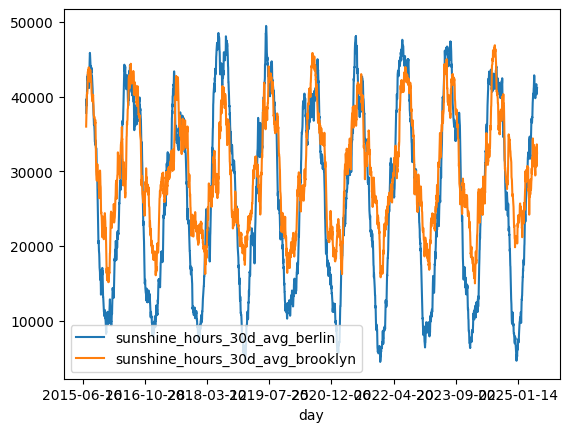

In [30]:
merged.plot(x='day', y=['sunshine_hours_30d_avg_berlin', 'sunshine_hours_30d_avg_brooklyn'])